In [ ]:
pip install opencv-python numpy

In [ ]:
#importing the required libraries
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
# List available cameras and their properties
for i in range(10):  # Try camera indices from 0 to 9
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"Camera {i}: {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}x{cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}")
        cap.release()
    else:
       print("no camera found")

no camera found
no camera found
no camera found
no camera found
no camera found
no camera found
no camera found
no camera found
no camera found
no camera found


In [ ]:
#displaying the imported image
cv2_imshow(image)

NameError: ignored

In [ ]:
#resizing the image for further process
new_width = 260
new_height = 200
resized_image = cv2.resize(image, (new_width, new_height))

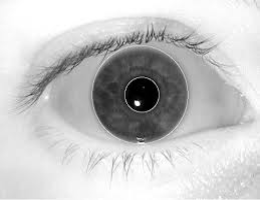

In [ ]:
#displaying the resized image
cv2_imshow(resized_image)

In [ ]:
#converting the image into gray-scale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

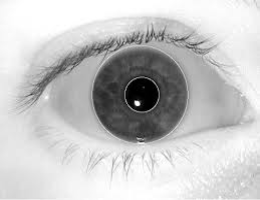

In [ ]:
#displaying the grayscaled image
cv2_imshow(gray_image)

In [ ]:
#enhancing the grayscaled image
equalized_gray = cv2.equalizeHist(gray_image)

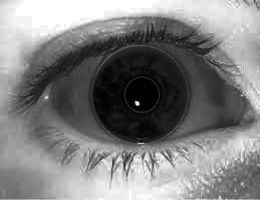

In [ ]:
#displaying the enhanced grayscale image
cv2_imshow(equalized_gray)

In [ ]:
#performing edge detection (segmentation on the enhanced image)
edges = cv2.Canny(equalized_gray, threshold1=70, threshold2=120)

In [ ]:
#finding the circles (iris) in the image using Hough circles
circles = cv2.HoughCircles(
    edges,
    cv2.HOUGH_GRADIENT,
    dp=1, minDist=20,
    param1=50, param2=30, minRadius=25, maxRadius=50
)

In [ ]:
#creating a green circle (pinpointing) over the areas detected as iris
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        iris_region = resized_image[y - r:y + r, x - r:x + r]
        cv2.circle(resized_image, (x, y), r, (0, 255, 0), 2)

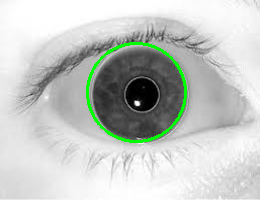

In [ ]:
#displaying the iris region in the resized image
cv2_imshow(resized_image)

In [ ]:
#creating a canvas for representation of dimensionally consistent iris (normalization)
canvas_width = 6*r
canvas_height = r
normalized_iris = np.zeros((canvas_height, canvas_width), dtype=np.uint8)

In [ ]:
#mapping the circular iris region to the square canvas using polar-to-Cartesian coordinates
for x_prime in range(canvas_width):
    for y_prime in range(canvas_height):
        theta = 2 * np.pi * (x_prime / canvas_width)  # Convert x' to angle
        radius = r * (y_prime / canvas_height)  # Convert y' to radius
        x_iris = int(x + radius * np.cos(theta))
        y_iris = int(y + radius * np.sin(theta))

        if 0 <= x_iris < equalized_gray.shape[1] and 0 <= y_iris < equalized_gray.shape[0]:
            normalized_iris[y_prime, x_prime] = equalized_gray[y_iris, x_iris]

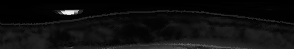

In [ ]:
#displaying the normalized iris
cv2_imshow(normalized_iris)

In [ ]:
#defining LBP parameter and applying LBP for feature extraction (feature encoding)
n_points = 8 * r
lbp_image = np.zeros_like(normalized_iris)
lbp_image = cv2.copyMakeBorder(lbp_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT)  # Padding for edge pixels
for i in range(1, normalized_iris.shape[0] - 1):
    for j in range(1, normalized_iris.shape[1] - 1):
        center = normalized_iris[i, j]
        binary_code = 0
        for n in range(n_points):
            x = j + int(radius * np.cos(2 * np.pi * n / n_points))
            y = i - int(radius * np.sin(2 * np.pi * n / n_points))

            if 0 <= x < normalized_iris.shape[1] and 0 <= y < normalized_iris.shape[0]:
                binary_code |= (normalized_iris[y, x] > center) << n
        lbp_image[i, j] = binary_code

In [ ]:
#calculating the LBP histogram to represent the iris
histogram = cv2.calcHist([lbp_image], [0], None, [256], [0, 256])

In [ ]:
#normalizing histogram
normalized_histogram = histogram / histogram.sum()

In [ ]:
#printing the normalized histogram
print (normalized_histogram)

[[5.5438524e-01]
 [4.5045046e-03]
 [6.2268148e-03]
 [3.5307366e-02]
 [6.8229996e-03]
 [1.7223106e-03]
 [1.9872815e-03]
 [3.7029676e-02]
 [7.7503975e-03]
 [1.9872814e-04]
 [6.6242712e-05]
 [1.2586116e-03]
 [1.0135135e-02]
 [1.4573397e-03]
 [2.1197668e-03]
 [2.5437202e-02]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [3.3783785e-03]
 [1.9872814e-04]
 [1.3248542e-04]
 [6.6242710e-04]
 [6.6242712e-05]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.3248542e-03]
 [8.0816112e-03]
 [3.9745629e-04]
 [3.9745629e-0

In [ ]:
#creating a 2D histogram image for better visualization
hist_image = np.zeros((r, r*6), dtype=np.uint8)

In [ ]:
#maping the normalized histogram values to the 2D histogram image
for pattern, count in enumerate(normalized_histogram):
    hist_image[:, pattern] = int(255 * count)  # Scale for visualization

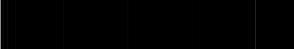

In [ ]:
#displaying the histogram image
cv2_imshow(hist_image)

In [ ]:
#saving the histogram
histogram_file = 'normalized_histogram_eye2.pkl'

with open(histogram_file, 'wb') as file:
    pickle.dump(normalized_histogram, file)

print(f'LBP histogram saved to {histogram_file}')

LBP histogram saved to normalized_histogram_eye2.pkl
